In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('sentiment.csv',names=['id','category','tweet'])

In [3]:
    df.head()

,id,category,tweet
0,6.3577E+17,negative,Not Available
1,6.3593E+17,neutral,IOS 9 App Transport Security. Mm need to check...
2,6.3595E+17,neutral,"Mar if you have an iOS device, you should down..."
3,6.36031E+17,negative,@jimmie_vanagon my phone does not run on lates...
4,6.36101E+17,positive,Not sure how to start your publication on iOS?...


In [4]:
lol=df.drop(df[df['tweet']=='Not Available'].index)

In [5]:
lol=lol.drop(lol[lol['category']=='Tweet'].index)


In [6]:
lol.describe()

,id,category,tweet
count,5421,5421,5421
unique,3827,3,5416
top,6.41432E+17,positive,Skimmed it May not LIKE the SCOTUS decision b...
freq,15,2599,2


In [7]:
lol.groupby('category').count()

,id,tweet
category,,
negative,869,869
neutral,1953,1953
positive,2599,2599


In [8]:
lol.drop('id',axis=1,inplace =True)

In [9]:
lol.head()

,category,tweet
1,neutral,IOS 9 App Transport Security. Mm need to check...
2,neutral,"Mar if you have an iOS device, you should down..."
3,negative,@jimmie_vanagon my phone does not run on lates...
4,positive,Not sure how to start your publication on iOS?...
5,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu..."


In [10]:
lol.groupby('category').count()

,tweet
category,
negative,869
neutral,1953
positive,2599


In [11]:
lol['length']=lol['tweet'].apply(len)

In [12]:
lol.head()

,category,tweet,length
1,neutral,IOS 9 App Transport Security. Mm need to check...,109
2,neutral,"Mar if you have an iOS device, you should down...",86
3,negative,@jimmie_vanagon my phone does not run on lates...,119
4,positive,Not sure how to start your publication on iOS?...,138
5,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu...",127


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  7.,   7.,   8.,  12.,  25.,  15.,  18.,  39.,  40.,  55.,  47.,
         48.,  60.,  91.,  76.,  77.,  79.,  90., 142., 136., 108., 129.,
        187., 130., 141., 158., 157., 224., 180., 197., 221., 445., 685.,
        807., 461.,  92.,  24.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 30.  ,  33.22,  36.44,  39.66,  42.88,  46.1 ,  49.32,  52.54,
         55.76,  58.98,  62.2 ,  65.42,  68.64,  71.86,  75.08,  78.3 ,
         81.52,  84.74,  87.96,  91.18,  94.4 ,  97.62, 100.84, 104.06,
        107.28, 110.5 , 113.72, 116.94, 120.16, 123.38, 126.6 , 129.82,
        133.04, 136.26, 139.48, 142.7 , 145.92, 149.14, 152.36, 155.58,
        158.8 , 162.02, 165.24, 168.46, 171.68, 174.9 , 178.12, 181.34,
        184.56, 187.78, 191.  ]),
 <a list of 50 Patch objects>)

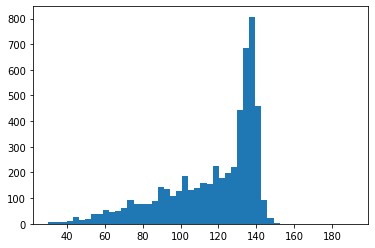

In [14]:
plt.hist(x='length',data=lol,bins=50)

In [15]:
lol['length'].describe()

count    5421.000000
mean      116.909242
std        24.865911
min        30.000000
25%       101.000000
50%       127.000000
75%       137.000000
max       191.000000
Name: length, dtype: float64

In [16]:
lol[lol['length']==191]['tweet'].iloc[0]

'Work on a Friday night &lt;&lt;&lt;&lt;&lt;  Venice Beach bound in the morning &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C305AA2BA8>,
      dtype=object)

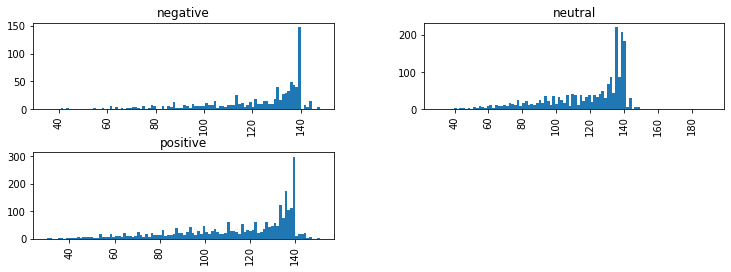

In [17]:
lol.hist(column='length',by='category',bins=100,figsize=(12,4))

In [18]:
lol.head()

,category,tweet,length
1,neutral,IOS 9 App Transport Security. Mm need to check...,109
2,neutral,"Mar if you have an iOS device, you should down...",86
3,negative,@jimmie_vanagon my phone does not run on lates...,119
4,positive,Not sure how to start your publication on iOS?...,138
5,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu...",127


In [19]:
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
mess='sample message! notice it has punctuation.'


In [22]:
mess=[c for c in mess if c not in string.punctuation]

In [23]:
from nltk.corpus import stopwords

In [24]:
def process(x):
    return re.sub(r'http\S+', '', x)

In [27]:
lol['tweet']=lol['tweet'].apply(process)

In [28]:
lol['tweet'][2]

'Mar if you have an iOS device, you should download our app too: '

In [26]:
import re

In [29]:
mess=''.join(mess)

In [30]:
mess.split()

['sample', 'message', 'notice', 'it', 'has', 'punctuation']

In [31]:
mess=[word for word in mess.split() if word.lower() not in stopwords.words('english')]

In [32]:
def text_process(mess):
    
    nonpunc=[char for char in mess if char not in string.punctuation]
    nonpunc= ''.join(nonpunc)
    
    return [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]


In [33]:
lol.head(5)['tweet'].apply(text_process)

1    [IOS, 9, App, Transport, Security, Mm, need, c...
2                    [Mar, iOS, device, download, app]
3    [jimmievanagon, phone, run, latest, IOS, may, ...
4    [sure, start, publication, iOS, Well, live, he...
5    [Two, Dollar, Tuesday, Forklift, 2, QuickKey, ...
Name: tweet, dtype: object

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
bow_transformer =CountVectorizer(analyzer=text_process).fit(lol['tweet'])

In [36]:
print(len(bow_transformer.vocabulary_))

16461


In [37]:
mess4=lol['tweet'][6]

In [38]:
mess4

"If you're not already signed up to test my iOS game, nows your chance! "

In [39]:
bow4=bow_transformer.transform([mess4])

In [40]:
print(bow4)

  (0, 7992)	1
  (0, 8987)	1
  (0, 10873)	1
  (0, 11467)	1
  (0, 12988)	1
  (0, 14698)	1
  (0, 15434)	1
  (0, 16428)	1


In [41]:
bow4.shape

(1, 16461)

In [49]:
message_bow=bow_transformer.transform(lol['tweet'])

In [85]:
message_bow

<5421x16461 sparse matrix of type '<class 'numpy.int64'>'
	with 63261 stored elements in Compressed Sparse Row format>

In [96]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_trans=TfidfTransformer(use_idf=False).fit(message_bow)

In [97]:
tfidf4=tfidf_trans.transform(bow4)

In [100]:
messages_tfidf=tfidf_trans.transform(message_bow)

In [101]:
from sklearn.naive_bayes import MultinomialNB

In [104]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,lol['category'])

In [105]:
spam_detect_model.predict(tfidf4)

array(['neutral'], dtype='<U8')

In [108]:
lol['category'][6]

'neutral'

In [109]:
all_pred=spam_detect_model.predict(messages_tfidf)

array(['neutral', 'neutral', 'positive', ..., 'positive', 'neutral',
       'positive'], dtype='<U8')

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
print(classification_report(lol['category'],all_pred))

              precision    recall  f1-score   support

    negative       1.00      0.06      0.11       869
     neutral       0.72      0.54      0.62      1953
    positive       0.65      0.98      0.78      2599

    accuracy                           0.67      5421
   macro avg       0.79      0.53      0.50      5421
weighted avg       0.73      0.67      0.62      5421



In [113]:
print(confusion_matrix(lol['category'],all_pred))

[[  50  364  455]
 [   0 1061  892]
 [   0   56 2543]]
